## One Million Preemptions

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


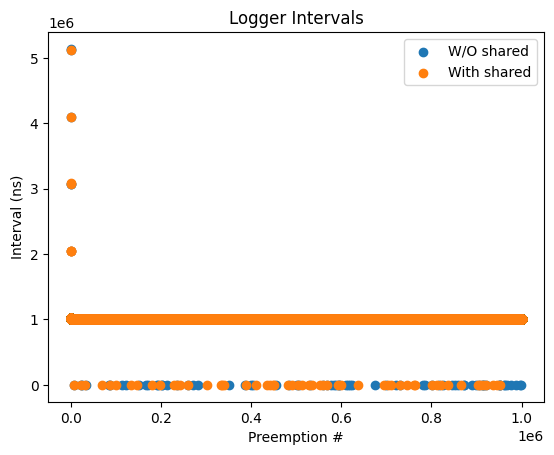

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# ----- Load the data -----
dataPath = '../Data/saxpyData/loopTests/'

# read in data
mill1 = pd.read_csv(dataPath+'saxpyMillion.csv')
mill1Shared = pd.read_csv(dataPath+'saxpyMillionSharedReal.csv')

# name columns
mill1.columns = ['start', 'end']
mill1Shared.columns = ['start', 'end']
mill1['interval'] = mill1['end'] - mill1['start']
mill1Shared['interval'] = mill1Shared['end'] - mill1Shared['start']

# ----- Plot the data -----
NUM_SAMPLES = 1000000
# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES), mill1['interval'], label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES), mill1Shared['interval'], label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (ns)')
plt.title('Logger Intervals')

# Add legend
plt.legend(loc='upper right')

# Set y-axis limits
#plt.ylim(1.01*1e3, 1.03*1e3)

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()

### Zoom in

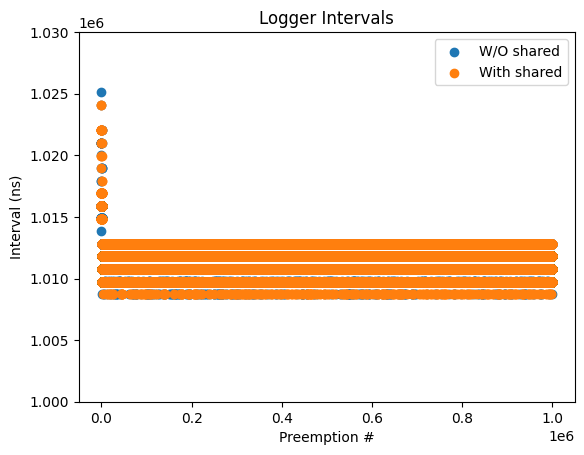

In [2]:
# ----- Plot the data -----
# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES), mill1['interval'], label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES), mill1Shared['interval'], label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (ns)')
plt.title('Logger Intervals')

# Add legend
plt.legend(loc='upper right')

# Set y-axis limits
plt.ylim(1.0*1e6, 1.03*1e6)

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()

### Intervals containing the preemptions

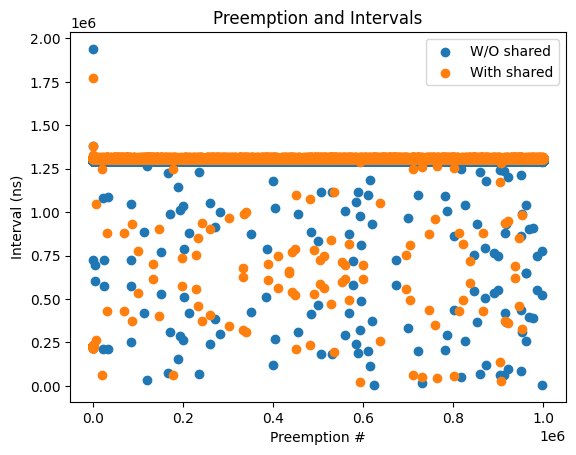

In [3]:
no_shared_ivls_mill = []
shared_ivls_mill = []
for i in range(0, len(mill1)-1):
  no_shared_ivls_mill.append(mill1['start'][i+1] - mill1['end'][i])
  shared_ivls_mill.append(mill1Shared['start'][i+1] - mill1Shared['end'][i])

# ----- Plot the data -----
# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_mill, label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES-1), shared_ivls_mill, label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (ns)')
plt.title('Preemption and Intervals')

# Add legend
plt.legend(loc='upper right')

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()

### Zoom in

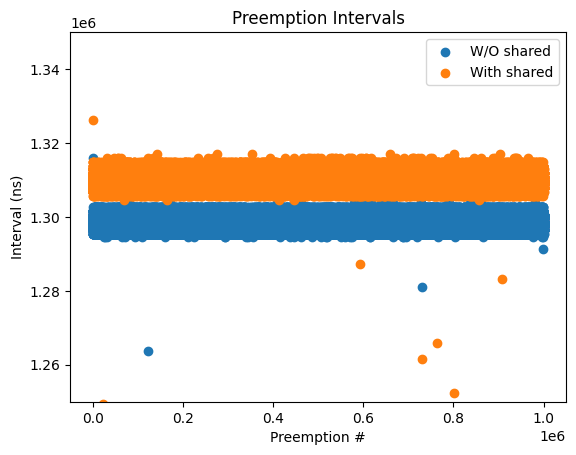

In [4]:
# ----- Plot the data -----
# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_mill, label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES-1), shared_ivls_mill, label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (ns)')
plt.title('Preemption Intervals')

# Add legend
plt.legend(loc='upper right')

# Set y-axis limits
plt.ylim(1.25*1e6, 1.35*1e6)

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()

### Plot separately

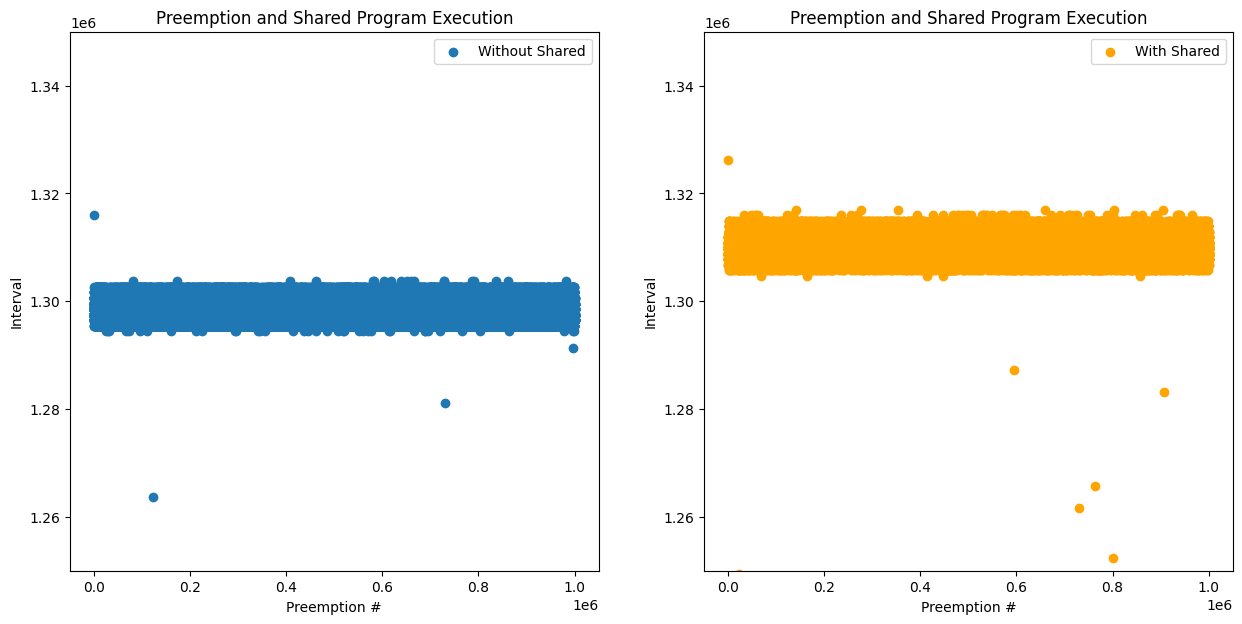

In [5]:
# Create the subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Scatterplot of without shared memory
ax1.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_mill, label='Without Shared')

# Add labels and title
ax1.set_xlabel('Preemption #')
ax1.set_ylabel('Interval')
ax1.set_title('Preemption and Shared Program Execution')
ax1.legend(loc='upper right')

# Set y-axis limits
ax1.set_ylim(1.25*1e6, 1.35*1e6)

# Scatterplot of with shared memory
ax2.scatter(range(1, NUM_SAMPLES-1), shared_ivls_mill, label='With Shared', color='orange')
ax2.legend(loc='upper right')

# Add labels and title
ax2.set_xlabel('Preemption #')
ax2.set_ylabel('Interval')
ax2.set_title('Preemption and Shared Program Execution')

# Set y-axis limits
ax2.set_ylim(1.25*1e6, 1.35*1e6)

plt.show()

### 5-number summaries

In [6]:
sum_no_shared =  np.percentile(no_shared_ivls_mill, [0, 25, 50, 75, 100], method='midpoint')

# Print the 5-number summaries
print('No Shared Memory:\n-----------------')
print("Minimum:", sum_no_shared[0])
print("Q1:", sum_no_shared[1])
print("Median:", sum_no_shared[2])
print("Q3:", sum_no_shared[3])
print("Maximum:", sum_no_shared[4])
print('-----------------\n')

print('Shared Memory:\n-----------------')
sum_shared = np.percentile(shared_ivls_mill, [0, 25, 50, 75, 100], method='midpoint')
print("Minimum:", sum_shared[0])
print("Q1:", sum_shared[1])
print("Median:", sum_shared[2])
print("Q3:", sum_shared[3])
print("Maximum:", sum_shared[4])
print('-----------------')

# Difference in means
no_shared_ivls_mill_mean = np.mean(no_shared_ivls_mill)
shared_ivls_mill_mean = np.mean(shared_ivls_mill)

print("\nMeans for the million trials (ns):\n")
print(f"No shared memory mean: {no_shared_ivls_mill_mean}")
print(f"With shared memory mean: {shared_ivls_mill_mean}")
print(f"\nDifference in means for the million trials: {shared_ivls_mill_mean - no_shared_ivls_mill_mean}")
print(f"Difference in microseconds: {(shared_ivls_mill_mean - no_shared_ivls_mill_mean) / 1000}")

No Shared Memory:
-----------------
Minimum: 5120.0
Q1: 1297529.0
Median: 1298553.0
Q3: 1298553.0
Maximum: 1939637.0
-----------------

Shared Memory:
-----------------
Minimum: 23554.0
Q1: 1308774.0
Median: 1309798.0
Q3: 1309799.0
Maximum: 1773707.0
-----------------

Means for the million trials (ns):

No shared memory mean: 1297983.09494219
With shared memory mean: 1309219.6481782964

Difference in means for the million trials: 11236.55323610641
Difference in microseconds: 11.23655323610641


#### Loop method

In [7]:
# Make sure loop is correct
test_list = pd.DataFrame({'start': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'end': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})
print(test_list.head())
diff_test = []
for i in range(0, len(test_list)-1):
  diff_test.append(test_list['start'][i+1] - test_list['end'][i])
diff_test
# Loop seems to be correct

   start  end
0      1   10
1      2   20
2      3   30
3      4   40
4      5   50


[-8, -17, -26, -35, -44, -53, -62, -71, -80]